In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
df = pd.read_csv('driver-data.csv')

In [42]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [43]:
features= df.drop('id',axis=1)

In [44]:
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [45]:
features.shape

(4000, 2)

In [46]:
features.size

8000

In [47]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [48]:
kmeans= KMeans( n_clusters=4)

In [49]:
cluster=kmeans.fit(features)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
np.unique(cluster.labels_)

array([0, 1, 2, 3])

In [51]:
cluster.cluster_centers_

array([[ 49.98800649,   5.20944484],
       [177.83509615,  70.28846154],
       [180.34311782,  10.52011494],
       [ 50.43591549,  32.39671362]])

In [55]:
df['cluster']=cluster.labels_

In [56]:
df[df['cluster']==2]

,id,mean_dist_day,mean_over_speed_perc,cluster
3206,3423313932,199.81,32,2
3213,3423313466,211.36,5,2
3215,3423311847,208.47,26,2
3220,3423311045,186.28,4,2
3241,3423313048,162.56,23,2
...,...,...,...,...
3995,3423310685,160.04,10,2
3996,3423312600,176.17,5,2
3997,3423312921,170.91,12,2
3998,3423313630,176.14,5,2


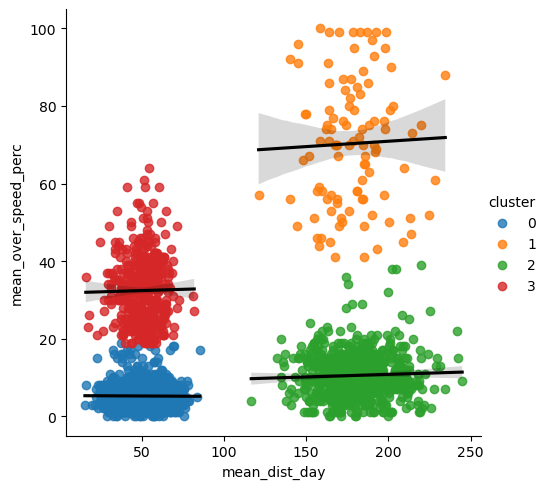

In [67]:
sns.lmplot(data=df,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster',line_kws={'color':'black'})

### Optimum value of cluster

In [60]:
cluster.inertia_

719601.0859909917

In [62]:
inertia=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [63]:
inertia

[12184626.129627973,
 1316420.850947719,
 992634.0606702475,
 719601.5383469039,
 534639.2167980463,
 372848.35662687133,
 319740.7853043489,
 277217.42108747957,
 252680.44778540992,
 229928.9759798706]

Text(0.5, 1.0, 'Optimum value of K')

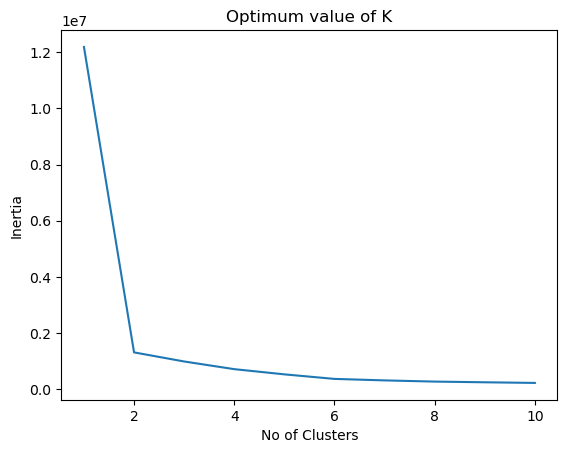

In [64]:
plt.plot(range(1,11),inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.title('Optimum value of K')